In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")

# Dropping the null values and checking the dataypes 

In [3]:
df.dropna(inplace=True)
df.dtypes

Temperature    float64
Pressure       float64
Methane        float64
Nitrogen       float64
M1_conc        float64
M2_conc        float64
Salttype        object
D_change       float64
Phase           object
IFT            float64
dtype: object

##  Looking at the statistics

In [4]:
import seaborn as sns

In [5]:
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

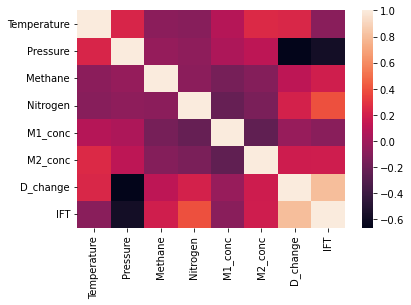

In [6]:
sns.heatmap(df.corr())

In [7]:
df.columns

Index(['Temperature', 'Pressure', 'Methane', 'Nitrogen', 'M1_conc', 'M2_conc',
       'Salttype', 'D_change', 'Phase', 'IFT'],
      dtype='object')

# Separating the x and y variables and splitting train and test 

In [8]:
X= df. drop(['Salttype','Phase','IFT'],axis=1).astype(float)

In [9]:
y=df.IFT.astype(float)

## Looking at the test and train shape on their axis and looking at random state

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=5)

In [11]:
X_train.shape, y_train.shape

((1236, 7), (1236,))

## Normalization  

In [12]:
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Looking at Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.score(X_train,y_train)

0.7978371765726865

In [15]:
lr.score(X_test,y_test)

0.8241265227780142

# Writing a random_state hypothesis 

In [16]:
random_state= np.arange(50)
test_score=[]
train_score=[]
train_mse=[]
test_mse=[]
for i in random_state:
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=i)
    scaler= MinMaxScaler()
    X_train= scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    test_score.append(lr.score(X_test,y_test))
    train_score.append(lr.score(X_train,y_train))
    test_mse.append(mean_squared_error(y_test,lr.predict(X_test)))
    train_mse.append(mean_squared_error(y_train,lr.predict(X_train)))

In [17]:
test=np.array(test_score)
train=np.array(train_score)
tr_mse=np.array(train_mse)
te_mse=np.array(test_mse)

In [18]:
np.argmin(te_mse),np.min(te_mse),np.mean(te_mse)

(2, 22.59088563753122, 26.171993850864123)

In [19]:
np.max(test), np.argmax(test), np.mean(test) #test score statistics

(0.834306007256311, 36, 0.807310867240386)

In [20]:
np.max(train), np.min(train),np.argmax(train), np.mean(train)

(0.8138143262334987, 0.7914159460691363, 14, 0.8050573764206645)

# SVM 

In [22]:
random_state= np.arange(50)
test_score=[]
train_score=[]
train_mse=[]
test_mse=[]
for i in random_state:
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=i)
    scaler= MinMaxScaler()
    X_train= scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error
    lr=SVR()
    lr.fit(X_train,y_train)
    test_score.append(lr.score(X_test,y_test))
    train_score.append(lr.score(X_train,y_train))
    test_mse.append(mean_squared_error(y_test,lr.predict(X_test)))
    train_mse.append(mean_squared_error(y_train,lr.predict(X_train)))

In [23]:
test=np.array(test_score)
train=np.array(train_score)
tr_mse=np.array(train_mse)
te_mse=np.array(test_mse)

In [24]:
np.max(test),np.mean(test),np.argmax(test)

(0.8669422013498893, 0.8448102014681544, 23)

In [25]:
np.max(train),np.mean(train),np.argmax(train)

(0.8586147735932034, 0.8509141355431586, 43)

## Using Random state 5 which two models agree is the best combination of data to test for Xgboost 

In [26]:
X_gtrain,X_gtest,y_gtrain,y_gtest=train_test_split(X,y,random_state=5, train_size=0.7)

In [27]:
X_gtrain=scaler.fit_transform(X_gtrain)
X_gtest=scaler.transform(X_gtest)

In [28]:
xgbr=XGBRegressor(learning_rate=0.301, reg_lambda=1,max_depth=6) # kept the hyperparameters standard.

In [29]:
xgbr.fit(X_gtrain,y_gtrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.301, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
xgbr.score(X_gtrain,y_gtrain) #clear overfit of data

0.9992087293745039

In [31]:
xgbr.score(X_gtest,y_gtest) # clear overfit of data but good results

0.9835296360249438

### Checking Mean squared error for the eXtreme Gradient Boosting xgboost

In [32]:
x_t=xgbr.predict(X_gtest)

In [33]:
mean_squared_error(y_gtest,x_t) # cost of test data

2.2766442915824094

In [34]:
mean_squared_error(y_gtrain,xgbr.predict(X_gtrain))# cost of train data

0.10649596238693186

In [35]:
X_gtest.shape, y_test.shape

((530, 7), (530,))

# Testing the IFT using unseen data to test effectiveness 

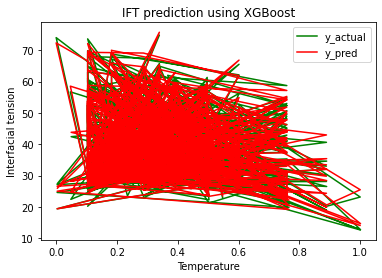

In [36]:
plt.figure()
plt.plot(X_gtest[:,0],y_gtest,'green', label='y_actual')
plt.plot(X_gtest[:,0],x_t,'red', label='y_pred')
plt.legend(loc=1)
plt.xlabel("Temperature")
plt.ylabel("Interfacial tension")
plt.title("IFT prediction using XGBoost")
plt.show()

# Using a Neural Network to test Interfacial tension 

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [38]:
model=Sequential([
    Dense(50, 'relu'),
    Dense(100,'relu',kernel_regularizer=l2(0.1)),
    Dense(200,'relu',kernel_regularizer=l2(0.1)),
    Dense(300,'relu'),
    Dense(400,'relu'),
    Dense(1,'linear')
])

model.compile(optimizer=Adam(0.009),loss='mse', metrics=['mse','mae'])

In [39]:
#model.compile(optimizer=Adam(0.01),loss='mse', metrics=['mse'])

# splitting the data

In [40]:
X_nntrain,X_nntest,y_nntrain,y_nntest=train_test_split(X,y,random_state=5, train_size=0.7)
X_ntrain=scaler.fit_transform(X_nntrain)
X_ntest=scaler.transform(X_nntest)
        
    

In [41]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<1.4:
            self.model.stop_training=True

In [42]:
history=model.fit(X_ntrain,y_nntrain,epochs=5000, callbacks=Mycallback())

Epoch 1/5000
39/39 [==============================] - 1s 4ms/step - loss: 684.9909 - mse: 673.7674 - mae: 20.9394
Epoch 2/5000
39/39 [==============================] - 0s 4ms/step - loss: 58.3040 - mse: 48.8826 - mae: 5.3795
Epoch 3/5000
39/39 [==============================] - 0s 4ms/step - loss: 33.3012 - mse: 24.5103 - mae: 3.8405
Epoch 4/5000
39/39 [==============================] - 0s 3ms/step - loss: 26.3092 - mse: 18.0293 - mae: 3.1172
Epoch 5/5000
39/39 [==============================] - 0s 3ms/step - loss: 22.6166 - mse: 14.7736 - mae: 2.8006
Epoch 6/5000
39/39 [==============================] - 0s 4ms/step - loss: 21.0600 - mse: 13.5595 - mae: 2.7138
Epoch 7/5000
39/39 [==============================] - 0s 4ms/step - loss: 19.5236 - mse: 12.3634 - mae: 2.5657
Epoch 8/5000
39/39 [==============================] - 0s 4ms/step - loss: 17.0461 - mse: 10.1797 - mae: 2.2975
Epoch 9/5000
39/39 [==============================] - 0s 3ms/step - loss: 15.6273 - mse: 9.0384 - mae: 2.2509

39/39 [==============================] - 0s 5ms/step - loss: 6.5434 - mse: 5.4879 - mae: 1.7317
Epoch 76/5000
39/39 [==============================] - 0s 5ms/step - loss: 6.1968 - mse: 5.1558 - mae: 1.6907
Epoch 77/5000
39/39 [==============================] - 0s 7ms/step - loss: 6.2349 - mse: 5.2010 - mae: 1.7021
Epoch 78/5000
39/39 [==============================] - 0s 4ms/step - loss: 7.0388 - mse: 6.0217 - mae: 1.8381
Epoch 79/5000
39/39 [==============================] - 0s 9ms/step - loss: 5.4064 - mse: 4.3924 - mae: 1.5729
Epoch 80/5000
39/39 [==============================] - 0s 7ms/step - loss: 6.4270 - mse: 5.4289 - mae: 1.7568
Epoch 81/5000
39/39 [==============================] - 0s 4ms/step - loss: 6.1487 - mse: 5.1679 - mae: 1.7155
Epoch 82/5000
39/39 [==============================] - 0s 4ms/step - loss: 5.2897 - mse: 4.3156 - mae: 1.5691
Epoch 83/5000
39/39 [==============================] - 0s 4ms/step - loss: 7.5125 - mse: 6.5546 - mae: 1.9221
Epoch 84/5000
39/39 [===

39/39 [==============================] - 0s 5ms/step - loss: 5.5284 - mse: 4.8643 - mae: 1.6891
Epoch 150/5000
39/39 [==============================] - 0s 6ms/step - loss: 4.4405 - mse: 3.7829 - mae: 1.4498
Epoch 151/5000
39/39 [==============================] - 0s 6ms/step - loss: 4.4720 - mse: 3.8243 - mae: 1.4740
Epoch 152/5000
39/39 [==============================] - 0s 6ms/step - loss: 4.9892 - mse: 4.3350 - mae: 1.6082
Epoch 153/5000
39/39 [==============================] - 0s 5ms/step - loss: 6.5169 - mse: 5.8677 - mae: 1.8382
Epoch 154/5000
39/39 [==============================] - 0s 4ms/step - loss: 7.1522 - mse: 6.4988 - mae: 1.9561
Epoch 155/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.5970 - mse: 3.9522 - mae: 1.5067
Epoch 156/5000
39/39 [==============================] - 0s 5ms/step - loss: 7.2912 - mse: 6.6502 - mae: 1.9540
Epoch 157/5000
39/39 [==============================] - 0s 5ms/step - loss: 5.9111 - mse: 5.2549 - mae: 1.7102
Epoch 158/5000
3

39/39 [==============================] - 0s 5ms/step - loss: 9.8837 - mse: 9.3306 - mae: 2.4007
Epoch 223/5000
39/39 [==============================] - 0s 4ms/step - loss: 5.0775 - mse: 4.5068 - mae: 1.6095
Epoch 224/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.1938 - mse: 3.6215 - mae: 1.4209
Epoch 225/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.7639 - mse: 3.1919 - mae: 1.3437
Epoch 226/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.8837 - mse: 3.3178 - mae: 1.3800
Epoch 227/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.1401 - mse: 3.5759 - mae: 1.4087
Epoch 228/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.9182 - mse: 3.3631 - mae: 1.3622
Epoch 229/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.9026 - mse: 3.3542 - mae: 1.3491
Epoch 230/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.9198 - mse: 4.3792 - mae: 1.5784
Epoch 231/5000
3

39/39 [==============================] - 0s 5ms/step - loss: 5.0225 - mse: 4.4769 - mae: 1.6373
Epoch 296/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.4218 - mse: 3.8687 - mae: 1.4646
Epoch 297/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.3790 - mse: 3.8370 - mae: 1.4594
Epoch 298/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.9607 - mse: 3.4223 - mae: 1.3841
Epoch 299/5000
39/39 [==============================] - 0s 4ms/step - loss: 5.1766 - mse: 4.6403 - mae: 1.6275
Epoch 300/5000
39/39 [==============================] - 0s 4ms/step - loss: 5.1486 - mse: 4.6054 - mae: 1.6469
Epoch 301/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.5282 - mse: 3.9953 - mae: 1.4780
Epoch 302/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.7589 - mse: 3.2333 - mae: 1.3404
Epoch 303/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.1799 - mse: 3.6509 - mae: 1.4362
Epoch 304/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 3.7869 - mse: 3.2886 - mae: 1.3715
Epoch 369/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1583 - mse: 2.6650 - mae: 1.1990
Epoch 370/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.3658 - mse: 2.8844 - mae: 1.2749
Epoch 371/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.3811 - mse: 2.9029 - mae: 1.2713
Epoch 372/5000
39/39 [==============================] - 0s 4ms/step - loss: 6.0851 - mse: 5.5967 - mae: 1.8479
Epoch 373/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.9556 - mse: 3.4554 - mae: 1.3768
Epoch 374/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2602 - mse: 2.7653 - mae: 1.2195
Epoch 375/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.2457 - mse: 3.7494 - mae: 1.4732
Epoch 376/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.3078 - mse: 2.8192 - mae: 1.2396
Epoch 377/5000
3

39/39 [==============================] - 0s 5ms/step - loss: 2.9671 - mse: 2.5047 - mae: 1.1589
Epoch 442/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1857 - mse: 2.7161 - mae: 1.2127
Epoch 443/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.5448 - mse: 3.0781 - mae: 1.3115
Epoch 444/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.1728 - mse: 3.7139 - mae: 1.4512
Epoch 445/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.5464 - mse: 4.0959 - mae: 1.5205
Epoch 446/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.2396 - mse: 3.7905 - mae: 1.4526
Epoch 447/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8509 - mse: 2.3934 - mae: 1.1448
Epoch 448/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9187 - mse: 2.4584 - mae: 1.1425
Epoch 449/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.3434 - mse: 2.8898 - mae: 1.2778
Epoch 450/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 3.0773 - mse: 2.6094 - mae: 1.1903
Epoch 515/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.4169 - mse: 2.9482 - mae: 1.2824
Epoch 516/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.1908 - mse: 3.7339 - mae: 1.4636
Epoch 517/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1898 - mse: 2.7148 - mae: 1.2433
Epoch 518/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0401 - mse: 2.5737 - mae: 1.2021
Epoch 519/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2890 - mse: 2.8313 - mae: 1.2493
Epoch 520/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8710 - mse: 2.4141 - mae: 1.1523
Epoch 521/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0241 - mse: 2.5686 - mae: 1.1752
Epoch 522/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.7118 - mse: 3.2571 - mae: 1.3384
Epoch 523/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 3.3539 - mse: 2.9162 - mae: 1.2799
Epoch 588/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8467 - mse: 2.4061 - mae: 1.1456
Epoch 589/5000
39/39 [==============================] - 0s 3ms/step - loss: 3.2057 - mse: 2.7777 - mae: 1.2279
Epoch 590/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.4679 - mse: 3.0365 - mae: 1.3198
Epoch 591/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.3894 - mse: 3.9622 - mae: 1.4863
Epoch 592/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.3838 - mse: 2.9460 - mae: 1.3128
Epoch 593/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.7853 - mse: 3.3367 - mae: 1.3942
Epoch 594/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8143 - mse: 2.3633 - mae: 1.1257
Epoch 595/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.4335 - mse: 2.9984 - mae: 1.3156
Epoch 596/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 3.0160 - mse: 2.5784 - mae: 1.1890
Epoch 661/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6364 - mse: 2.2065 - mae: 1.0812
Epoch 662/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.9775 - mse: 2.5444 - mae: 1.1704
Epoch 663/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7422 - mse: 2.3136 - mae: 1.1287
Epoch 664/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6900 - mse: 2.2686 - mae: 1.1115
Epoch 665/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.3581 - mse: 2.9433 - mae: 1.2491
Epoch 666/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9917 - mse: 2.5713 - mae: 1.1916
Epoch 667/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2223 - mse: 2.8037 - mae: 1.2322
Epoch 668/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.2006 - mse: 2.7733 - mae: 1.2370
Epoch 669/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 2.8527 - mse: 2.4292 - mae: 1.1413
Epoch 734/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.3597 - mse: 2.9427 - mae: 1.2810
Epoch 735/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.7605 - mse: 3.3338 - mae: 1.4084
Epoch 736/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.6548 - mse: 3.2089 - mae: 1.3678
Epoch 737/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0516 - mse: 2.6131 - mae: 1.2053
Epoch 738/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8729 - mse: 2.4495 - mae: 1.1477
Epoch 739/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2340 - mse: 2.8098 - mae: 1.2839
Epoch 740/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1590 - mse: 2.7279 - mae: 1.2233
Epoch 741/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1123 - mse: 2.6810 - mae: 1.2260
Epoch 742/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 3.7554 - mse: 3.3405 - mae: 1.3812
Epoch 807/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.4248 - mse: 3.0096 - mae: 1.3129
Epoch 808/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.7369 - mse: 2.3236 - mae: 1.1224
Epoch 809/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9423 - mse: 2.5312 - mae: 1.1599
Epoch 810/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8629 - mse: 2.4514 - mae: 1.1546
Epoch 811/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9450 - mse: 2.5336 - mae: 1.1759
Epoch 812/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1977 - mse: 2.7848 - mae: 1.2611
Epoch 813/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9023 - mse: 2.4920 - mae: 1.1617
Epoch 814/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0344 - mse: 2.6298 - mae: 1.1976
Epoch 815/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 2.8479 - mse: 2.4632 - mae: 1.1611
Epoch 880/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0684 - mse: 2.6797 - mae: 1.2161
Epoch 881/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6747 - mse: 2.2882 - mae: 1.1060
Epoch 882/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6460 - mse: 2.2683 - mae: 1.0918
Epoch 883/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.0296 - mse: 2.6547 - mae: 1.2293
Epoch 884/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8379 - mse: 2.4573 - mae: 1.1563
Epoch 885/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1662 - mse: 2.7874 - mae: 1.2788
Epoch 886/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.4742 - mse: 3.0994 - mae: 1.3092
Epoch 887/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.6373 - mse: 3.2569 - mae: 1.3433
Epoch 888/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 2.7413 - mse: 2.3596 - mae: 1.1498
Epoch 953/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2939 - mse: 2.9159 - mae: 1.2872
Epoch 954/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.0353 - mse: 3.6595 - mae: 1.4536
Epoch 955/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9164 - mse: 2.5326 - mae: 1.1833
Epoch 956/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7009 - mse: 2.3134 - mae: 1.1192
Epoch 957/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0969 - mse: 2.7143 - mae: 1.2344
Epoch 958/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0599 - mse: 2.6809 - mae: 1.2282
Epoch 959/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7653 - mse: 2.3945 - mae: 1.1444
Epoch 960/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.6882 - mse: 2.3248 - mae: 1.1205
Epoch 961/5000
3

39/39 [==============================] - 0s 4ms/step - loss: 3.1695 - mse: 2.7957 - mae: 1.2513
Epoch 1026/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6301 - mse: 2.2506 - mae: 1.1271
Epoch 1027/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5946 - mse: 2.2177 - mae: 1.0842
Epoch 1028/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.9908 - mse: 2.6161 - mae: 1.1882
Epoch 1029/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6624 - mse: 2.2873 - mae: 1.1291
Epoch 1030/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6507 - mse: 2.2770 - mae: 1.1266
Epoch 1031/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0128 - mse: 2.6408 - mae: 1.2129
Epoch 1032/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5765 - mse: 2.2052 - mae: 1.0769
Epoch 1033/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6707 - mse: 2.3000 - mae: 1.1189
Epoch 10

39/39 [==============================] - 0s 4ms/step - loss: 2.6209 - mse: 2.2571 - mae: 1.0951
Epoch 1099/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2158 - mse: 2.8519 - mae: 1.2615
Epoch 1100/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1248 - mse: 2.7619 - mae: 1.2444
Epoch 1101/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7002 - mse: 2.3335 - mae: 1.1198
Epoch 1102/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6173 - mse: 2.2580 - mae: 1.1109
Epoch 1103/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7673 - mse: 2.4021 - mae: 1.1581
Epoch 1104/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6710 - mse: 2.3015 - mae: 1.1364
Epoch 1105/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6208 - mse: 2.2520 - mae: 1.0980
Epoch 1106/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1801 - mse: 2.8149 - mae: 1.2401
Epoch 11

39/39 [==============================] - 0s 4ms/step - loss: 3.0348 - mse: 2.6556 - mae: 1.2362
Epoch 1172/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6999 - mse: 2.3241 - mae: 1.1294
Epoch 1173/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7185 - mse: 2.3464 - mae: 1.1480
Epoch 1174/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3940 - mse: 2.0268 - mae: 1.0357
Epoch 1175/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4669 - mse: 2.1102 - mae: 1.0677
Epoch 1176/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5717 - mse: 2.2093 - mae: 1.0967
Epoch 1177/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8305 - mse: 2.4665 - mae: 1.1704
Epoch 1178/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7934 - mse: 2.4389 - mae: 1.1488
Epoch 1179/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0246 - mse: 2.6696 - mae: 1.2269
Epoch 11

39/39 [==============================] - 0s 4ms/step - loss: 2.6529 - mse: 2.2882 - mae: 1.0854
Epoch 1245/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5156 - mse: 2.1574 - mae: 1.0796
Epoch 1246/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2122 - mse: 2.8589 - mae: 1.2735
Epoch 1247/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.7736 - mse: 2.4200 - mae: 1.1621
Epoch 1248/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7176 - mse: 2.3685 - mae: 1.1361
Epoch 1249/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7714 - mse: 2.4182 - mae: 1.1298
Epoch 1250/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.5586 - mse: 2.1983 - mae: 1.0754
Epoch 1251/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6551 - mse: 2.3043 - mae: 1.1245
Epoch 1252/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8640 - mse: 2.5156 - mae: 1.1659
Epoch 12

39/39 [==============================] - 0s 4ms/step - loss: 2.7186 - mse: 2.3573 - mae: 1.1181
Epoch 1318/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4986 - mse: 2.1419 - mae: 1.0640
Epoch 1319/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9403 - mse: 2.5854 - mae: 1.2157
Epoch 1320/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8652 - mse: 2.5094 - mae: 1.1739
Epoch 1321/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5118 - mse: 2.1612 - mae: 1.0843
Epoch 1322/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9144 - mse: 2.5551 - mae: 1.1883
Epoch 1323/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.3729 - mse: 3.0247 - mae: 1.3081
Epoch 1324/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6665 - mse: 2.3178 - mae: 1.1236
Epoch 1325/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8234 - mse: 2.4612 - mae: 1.1561
Epoch 13

39/39 [==============================] - 0s 4ms/step - loss: 3.3893 - mse: 3.0228 - mae: 1.3365
Epoch 1391/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0039 - mse: 2.6413 - mae: 1.2231
Epoch 1392/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5855 - mse: 2.2290 - mae: 1.1112
Epoch 1393/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8116 - mse: 2.4587 - mae: 1.1464
Epoch 1394/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8020 - mse: 2.4408 - mae: 1.1454
Epoch 1395/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8199 - mse: 2.4630 - mae: 1.1610
Epoch 1396/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.5978 - mse: 3.2452 - mae: 1.3567
Epoch 1397/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7740 - mse: 2.4213 - mae: 1.1477
Epoch 1398/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0627 - mse: 2.7058 - mae: 1.2266
Epoch 13

39/39 [==============================] - 0s 4ms/step - loss: 2.7979 - mse: 2.4503 - mae: 1.1539
Epoch 1464/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6465 - mse: 2.2916 - mae: 1.1047
Epoch 1465/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4127 - mse: 2.0584 - mae: 1.0284
Epoch 1466/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7239 - mse: 2.3766 - mae: 1.1432
Epoch 1467/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6720 - mse: 2.3225 - mae: 1.1294
Epoch 1468/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6703 - mse: 2.3172 - mae: 1.1226
Epoch 1469/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5900 - mse: 2.2335 - mae: 1.1067
Epoch 1470/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5963 - mse: 2.2433 - mae: 1.0787
Epoch 1471/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7480 - mse: 2.3948 - mae: 1.1415
Epoch 14

39/39 [==============================] - 0s 4ms/step - loss: 2.6215 - mse: 2.2596 - mae: 1.1281
Epoch 1537/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8846 - mse: 2.5332 - mae: 1.1801
Epoch 1538/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.9878 - mse: 2.6333 - mae: 1.2185
Epoch 1539/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8521 - mse: 2.4922 - mae: 1.1329
Epoch 1540/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0389 - mse: 2.6922 - mae: 1.2282
Epoch 1541/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1420 - mse: 2.7856 - mae: 1.2426
Epoch 1542/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7886 - mse: 2.4351 - mae: 1.1530
Epoch 1543/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0216 - mse: 2.6729 - mae: 1.2091
Epoch 1544/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5743 - mse: 2.2239 - mae: 1.1002
Epoch 15

39/39 [==============================] - 0s 4ms/step - loss: 2.6546 - mse: 2.3047 - mae: 1.1240
Epoch 1610/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5253 - mse: 2.1743 - mae: 1.0668
Epoch 1611/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3730 - mse: 2.0224 - mae: 1.0401
Epoch 1612/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4927 - mse: 2.1505 - mae: 1.0671
Epoch 1613/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9801 - mse: 2.6295 - mae: 1.2139
Epoch 1614/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8607 - mse: 2.5167 - mae: 1.1751
Epoch 1615/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6781 - mse: 2.3329 - mae: 1.1515
Epoch 1616/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9559 - mse: 2.6179 - mae: 1.2067
Epoch 1617/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4198 - mse: 2.0774 - mae: 1.0449
Epoch 16

39/39 [==============================] - 0s 4ms/step - loss: 2.5372 - mse: 2.1915 - mae: 1.0997
Epoch 1683/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4474 - mse: 2.1038 - mae: 1.0460
Epoch 1684/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4366 - mse: 2.0960 - mae: 1.0588
Epoch 1685/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5000 - mse: 2.1455 - mae: 1.0804
Epoch 1686/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6597 - mse: 2.3103 - mae: 1.1195
Epoch 1687/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5189 - mse: 2.1788 - mae: 1.0996
Epoch 1688/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8389 - mse: 2.4986 - mae: 1.1884
Epoch 1689/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3428 - mse: 1.9993 - mae: 1.0340
Epoch 1690/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6755 - mse: 2.3319 - mae: 1.1237
Epoch 16

39/39 [==============================] - 0s 4ms/step - loss: 2.4284 - mse: 2.0582 - mae: 1.0438
Epoch 1756/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4742 - mse: 2.1108 - mae: 1.0607
Epoch 1757/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3094 - mse: 1.9541 - mae: 1.0118
Epoch 1758/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8617 - mse: 2.5146 - mae: 1.1725
Epoch 1759/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7350 - mse: 2.3888 - mae: 1.1505
Epoch 1760/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4062 - mse: 2.0667 - mae: 1.0339
Epoch 1761/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2937 - mse: 1.9512 - mae: 0.9846
Epoch 1762/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4028 - mse: 2.0633 - mae: 1.0576
Epoch 1763/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4852 - mse: 2.1494 - mae: 1.0688
Epoch 17

39/39 [==============================] - 0s 4ms/step - loss: 2.6405 - mse: 2.3029 - mae: 1.1095
Epoch 1829/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3336 - mse: 1.9951 - mae: 1.0261
Epoch 1830/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9499 - mse: 2.6146 - mae: 1.1887
Epoch 1831/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5376 - mse: 2.2066 - mae: 1.0994
Epoch 1832/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3559 - mse: 2.0209 - mae: 1.0387
Epoch 1833/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4404 - mse: 2.1045 - mae: 1.0566
Epoch 1834/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2594 - mse: 1.9255 - mae: 0.9974
Epoch 1835/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9329 - mse: 2.5983 - mae: 1.2080
Epoch 1836/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8581 - mse: 2.5171 - mae: 1.1869
Epoch 18

39/39 [==============================] - 0s 4ms/step - loss: 2.6154 - mse: 2.2682 - mae: 1.1125
Epoch 1902/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5024 - mse: 2.1619 - mae: 1.0829
Epoch 1903/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7143 - mse: 2.3834 - mae: 1.1302
Epoch 1904/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7555 - mse: 2.4164 - mae: 1.1587
Epoch 1905/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6655 - mse: 2.3291 - mae: 1.1246
Epoch 1906/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8877 - mse: 2.5494 - mae: 1.2274
Epoch 1907/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4852 - mse: 2.1441 - mae: 1.0623
Epoch 1908/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6977 - mse: 2.3582 - mae: 1.1444
Epoch 1909/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5798 - mse: 2.2391 - mae: 1.1175
Epoch 19

39/39 [==============================] - 0s 4ms/step - loss: 2.6601 - mse: 2.3231 - mae: 1.1339
Epoch 1975/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8688 - mse: 2.5214 - mae: 1.1782
Epoch 1976/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0174 - mse: 2.6747 - mae: 1.2249
Epoch 1977/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9245 - mse: 2.5802 - mae: 1.2108
Epoch 1978/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5290 - mse: 2.1896 - mae: 1.0621
Epoch 1979/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7031 - mse: 2.3593 - mae: 1.1248
Epoch 1980/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4066 - mse: 2.0586 - mae: 1.0497
Epoch 1981/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4839 - mse: 2.1439 - mae: 1.0590
Epoch 1982/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3742 - mse: 2.0367 - mae: 1.0254
Epoch 19

39/39 [==============================] - 0s 4ms/step - loss: 3.2462 - mse: 2.9121 - mae: 1.2868
Epoch 2048/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9649 - mse: 2.6253 - mae: 1.2342
Epoch 2049/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8483 - mse: 2.5010 - mae: 1.1922
Epoch 2050/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4836 - mse: 2.1335 - mae: 1.0414
Epoch 2051/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3145 - mse: 1.9728 - mae: 1.0182
Epoch 2052/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4073 - mse: 2.0693 - mae: 1.0451
Epoch 2053/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5231 - mse: 2.1833 - mae: 1.0997
Epoch 2054/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6304 - mse: 2.2866 - mae: 1.1233
Epoch 2055/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3710 - mse: 2.0343 - mae: 1.0292
Epoch 20

39/39 [==============================] - 0s 4ms/step - loss: 2.2669 - mse: 1.9250 - mae: 1.0056
Epoch 2121/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3587 - mse: 2.0245 - mae: 1.0368
Epoch 2122/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9460 - mse: 2.6137 - mae: 1.1880
Epoch 2123/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3136 - mse: 1.9818 - mae: 1.0234
Epoch 2124/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2292 - mse: 1.8971 - mae: 1.0098
Epoch 2125/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6573 - mse: 2.3225 - mae: 1.1220
Epoch 2126/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4273 - mse: 2.0830 - mae: 1.0505
Epoch 2127/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6969 - mse: 2.3484 - mae: 1.1405
Epoch 2128/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4043 - mse: 2.0645 - mae: 1.0363
Epoch 21

39/39 [==============================] - 0s 4ms/step - loss: 2.4841 - mse: 2.1428 - mae: 1.0669
Epoch 2194/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3905 - mse: 2.0553 - mae: 1.0370
Epoch 2195/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4967 - mse: 2.1677 - mae: 1.0778
Epoch 2196/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3737 - mse: 2.0418 - mae: 1.0342
Epoch 2197/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5945 - mse: 2.2592 - mae: 1.1045
Epoch 2198/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4796 - mse: 2.1424 - mae: 1.0830
Epoch 2199/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5833 - mse: 2.2511 - mae: 1.1007
Epoch 2200/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4611 - mse: 2.1259 - mae: 1.0523
Epoch 2201/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4846 - mse: 2.1413 - mae: 1.0743
Epoch 22

39/39 [==============================] - 0s 4ms/step - loss: 2.2710 - mse: 1.9396 - mae: 1.0153
Epoch 2267/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2663 - mse: 1.9407 - mae: 1.0196
Epoch 2268/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7188 - mse: 2.3953 - mae: 1.1499
Epoch 2269/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4473 - mse: 2.1171 - mae: 1.0576
Epoch 2270/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5653 - mse: 2.2338 - mae: 1.1038
Epoch 2271/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2941 - mse: 1.9691 - mae: 1.0285
Epoch 2272/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4511 - mse: 2.1123 - mae: 1.0569
Epoch 2273/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6168 - mse: 2.2713 - mae: 1.1104
Epoch 2274/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5294 - mse: 2.1919 - mae: 1.0776
Epoch 22

39/39 [==============================] - 0s 5ms/step - loss: 2.4061 - mse: 2.0686 - mae: 1.0497
Epoch 2340/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3054 - mse: 1.9706 - mae: 1.0117
Epoch 2341/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4877 - mse: 2.1602 - mae: 1.0738
Epoch 2342/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6614 - mse: 2.3290 - mae: 1.1363
Epoch 2343/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6019 - mse: 2.2594 - mae: 1.1115
Epoch 2344/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3210 - mse: 1.9818 - mae: 1.0405
Epoch 2345/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4478 - mse: 2.1115 - mae: 1.0562
Epoch 2346/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2291 - mse: 1.8899 - mae: 0.9949
Epoch 2347/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7844 - mse: 2.4535 - mae: 1.1471
Epoch 23

39/39 [==============================] - 0s 4ms/step - loss: 2.9016 - mse: 2.5638 - mae: 1.1862
Epoch 2413/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3239 - mse: 1.9981 - mae: 1.0383
Epoch 2414/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5717 - mse: 2.2465 - mae: 1.1135
Epoch 2415/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1311 - mse: 2.8082 - mae: 1.2409
Epoch 2416/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.0021 - mse: 3.6610 - mae: 1.5001
Epoch 2417/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0883 - mse: 2.7495 - mae: 1.2611
Epoch 2418/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6232 - mse: 2.2874 - mae: 1.1017
Epoch 2419/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5456 - mse: 2.2094 - mae: 1.0981
Epoch 2420/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4016 - mse: 2.0625 - mae: 1.0514
Epoch 24

39/39 [==============================] - 0s 5ms/step - loss: 2.5741 - mse: 2.2573 - mae: 1.1056
Epoch 2486/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5133 - mse: 2.1927 - mae: 1.0736
Epoch 2487/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4117 - mse: 2.0924 - mae: 1.0542
Epoch 2488/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3145 - mse: 1.9981 - mae: 1.0299
Epoch 2489/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5523 - mse: 2.2368 - mae: 1.0974
Epoch 2490/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3648 - mse: 2.0480 - mae: 1.0553
Epoch 2491/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7797 - mse: 2.4522 - mae: 1.1681
Epoch 2492/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7300 - mse: 2.4119 - mae: 1.1404
Epoch 2493/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8896 - mse: 2.5612 - mae: 1.1981
Epoch 24

39/39 [==============================] - 0s 6ms/step - loss: 2.4040 - mse: 2.0710 - mae: 1.0482
Epoch 2559/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2617 - mse: 1.9320 - mae: 0.9977
Epoch 2560/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3758 - mse: 2.0521 - mae: 1.0484
Epoch 2561/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2533 - mse: 2.9245 - mae: 1.2944
Epoch 2562/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4696 - mse: 2.1363 - mae: 1.0755
Epoch 2563/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.4030 - mse: 2.0706 - mae: 1.0634
Epoch 2564/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.5042 - mse: 2.1749 - mae: 1.0786
Epoch 2565/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4639 - mse: 2.1363 - mae: 1.0669
Epoch 2566/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4469 - mse: 2.1195 - mae: 1.0678
Epoch 25

39/39 [==============================] - 0s 4ms/step - loss: 2.6809 - mse: 2.3540 - mae: 1.1381
Epoch 2632/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4665 - mse: 2.1372 - mae: 1.0787
Epoch 2633/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4508 - mse: 2.1235 - mae: 1.0585
Epoch 2634/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2994 - mse: 1.9744 - mae: 1.0104
Epoch 2635/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.6674 - mse: 2.3362 - mae: 1.1372
Epoch 2636/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5588 - mse: 2.2286 - mae: 1.1053
Epoch 2637/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4265 - mse: 2.0963 - mae: 1.0573
Epoch 2638/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3368 - mse: 2.0116 - mae: 1.0330
Epoch 2639/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6912 - mse: 2.3587 - mae: 1.1480
Epoch 26

39/39 [==============================] - 0s 4ms/step - loss: 2.3214 - mse: 2.0023 - mae: 1.0322
Epoch 2705/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3213 - mse: 1.9945 - mae: 1.0189
Epoch 2706/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3393 - mse: 2.0187 - mae: 1.0263
Epoch 2707/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8709 - mse: 2.5527 - mae: 1.1875
Epoch 2708/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6813 - mse: 2.3636 - mae: 1.1359
Epoch 2709/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3625 - mse: 2.0458 - mae: 1.0371
Epoch 2710/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3863 - mse: 2.0732 - mae: 1.0474
Epoch 2711/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5206 - mse: 2.2017 - mae: 1.0893
Epoch 2712/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3079 - mse: 1.9900 - mae: 1.0244
Epoch 27

39/39 [==============================] - 0s 4ms/step - loss: 2.3151 - mse: 1.9898 - mae: 1.0093
Epoch 2778/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2965 - mse: 1.9708 - mae: 1.0196
Epoch 2779/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4955 - mse: 2.1690 - mae: 1.0755
Epoch 2780/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5793 - mse: 2.2528 - mae: 1.1179
Epoch 2781/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6689 - mse: 2.3374 - mae: 1.1216
Epoch 2782/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3803 - mse: 2.0435 - mae: 1.0376
Epoch 2783/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1985 - mse: 1.8650 - mae: 0.9925
Epoch 2784/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3043 - mse: 1.9755 - mae: 1.0099
Epoch 2785/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.4220 - mse: 2.0987 - mae: 1.0550
Epoch 27

39/39 [==============================] - 0s 4ms/step - loss: 2.2403 - mse: 1.9218 - mae: 1.0146
Epoch 2851/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5387 - mse: 2.2246 - mae: 1.1216
Epoch 2852/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3088 - mse: 1.9894 - mae: 1.0223
Epoch 2853/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2480 - mse: 1.9300 - mae: 0.9941
Epoch 2854/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9874 - mse: 2.6653 - mae: 1.2193
Epoch 2855/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.5798 - mse: 3.2419 - mae: 1.3401
Epoch 2856/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7400 - mse: 2.4063 - mae: 1.1718
Epoch 2857/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5781 - mse: 2.2500 - mae: 1.1127
Epoch 2858/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4319 - mse: 2.1094 - mae: 1.0501
Epoch 28

39/39 [==============================] - 0s 4ms/step - loss: 2.5353 - mse: 2.1949 - mae: 1.0914
Epoch 2924/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3073 - mse: 1.9727 - mae: 1.0124
Epoch 2925/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3258 - mse: 1.9965 - mae: 1.0321
Epoch 2926/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2776 - mse: 1.9434 - mae: 1.0115
Epoch 2927/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2539 - mse: 1.9258 - mae: 1.0006
Epoch 2928/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2063 - mse: 1.8813 - mae: 0.9874
Epoch 2929/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3870 - mse: 2.0662 - mae: 1.0591
Epoch 2930/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5923 - mse: 2.2678 - mae: 1.1096
Epoch 2931/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6971 - mse: 2.3749 - mae: 1.1503
Epoch 29

39/39 [==============================] - 0s 4ms/step - loss: 2.2626 - mse: 1.9407 - mae: 1.0236
Epoch 2997/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3687 - mse: 2.0527 - mae: 1.0525
Epoch 2998/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2416 - mse: 1.9185 - mae: 1.0046
Epoch 2999/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4035 - mse: 2.0801 - mae: 1.0498
Epoch 3000/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.4204 - mse: 2.0983 - mae: 1.0656
Epoch 3001/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3215 - mse: 2.0001 - mae: 1.0478
Epoch 3002/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2550 - mse: 1.9313 - mae: 1.0040
Epoch 3003/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3657 - mse: 2.0460 - mae: 1.0306
Epoch 3004/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8973 - mse: 2.5664 - mae: 1.1854
Epoch 30

39/39 [==============================] - 0s 5ms/step - loss: 2.5954 - mse: 2.2503 - mae: 1.1032
Epoch 3070/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3261 - mse: 1.9836 - mae: 1.0050
Epoch 3071/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3594 - mse: 2.0062 - mae: 1.0289
Epoch 3072/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4125 - mse: 2.0654 - mae: 1.0508
Epoch 3073/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2199 - mse: 1.8815 - mae: 0.9966
Epoch 3074/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3064 - mse: 1.9746 - mae: 1.0343
Epoch 3075/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3125 - mse: 1.9853 - mae: 1.0326
Epoch 3076/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8668 - mse: 2.5326 - mae: 1.2028
Epoch 3077/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4615 - mse: 2.1336 - mae: 1.0674
Epoch 30

39/39 [==============================] - 0s 5ms/step - loss: 2.2324 - mse: 1.9080 - mae: 1.0021
Epoch 3143/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6002 - mse: 2.2790 - mae: 1.1111
Epoch 3144/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4660 - mse: 2.1470 - mae: 1.0724
Epoch 3145/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1700 - mse: 1.8495 - mae: 0.9790
Epoch 3146/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2462 - mse: 1.9277 - mae: 1.0100
Epoch 3147/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4956 - mse: 2.1685 - mae: 1.0955
Epoch 3148/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4148 - mse: 2.0943 - mae: 1.0614
Epoch 3149/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4583 - mse: 2.1407 - mae: 1.0661
Epoch 3150/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8918 - mse: 2.5761 - mae: 1.2210
Epoch 31

39/39 [==============================] - 0s 4ms/step - loss: 2.4247 - mse: 2.1097 - mae: 1.0534
Epoch 3216/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5484 - mse: 2.2331 - mae: 1.0934
Epoch 3217/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2013 - mse: 1.8786 - mae: 1.0071
Epoch 3218/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1795 - mse: 1.8618 - mae: 1.0043
Epoch 3219/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2620 - mse: 1.9507 - mae: 1.0242
Epoch 3220/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3353 - mse: 2.0223 - mae: 1.0429
Epoch 3221/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.5511 - mse: 2.2285 - mae: 1.0951
Epoch 3222/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4138 - mse: 2.0819 - mae: 1.0627
Epoch 3223/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5396 - mse: 2.2207 - mae: 1.0860
Epoch 32

39/39 [==============================] - 0s 4ms/step - loss: 2.5349 - mse: 2.1965 - mae: 1.1039
Epoch 3289/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4736 - mse: 2.1400 - mae: 1.0717
Epoch 3290/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2339 - mse: 1.9007 - mae: 1.0101
Epoch 3291/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2343 - mse: 1.9060 - mae: 1.0004
Epoch 3292/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3588 - mse: 2.0370 - mae: 1.0417
Epoch 3293/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3262 - mse: 1.9995 - mae: 1.0272
Epoch 3294/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4207 - mse: 2.0746 - mae: 1.0538
Epoch 3295/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2234 - mse: 1.8869 - mae: 1.0062
Epoch 3296/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3188 - mse: 1.9930 - mae: 1.0142
Epoch 32

39/39 [==============================] - 0s 4ms/step - loss: 2.3628 - mse: 2.0317 - mae: 1.0319
Epoch 3362/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2870 - mse: 1.9575 - mae: 1.0199
Epoch 3363/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2826 - mse: 1.9575 - mae: 1.0266
Epoch 3364/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6990 - mse: 2.3688 - mae: 1.1430
Epoch 3365/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5008 - mse: 2.1727 - mae: 1.0747
Epoch 3366/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5422 - mse: 2.2137 - mae: 1.0963
Epoch 3367/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2188 - mse: 1.8917 - mae: 1.0015
Epoch 3368/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4327 - mse: 2.1061 - mae: 1.0514
Epoch 3369/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4174 - mse: 2.0898 - mae: 1.0703
Epoch 33

39/39 [==============================] - 0s 5ms/step - loss: 2.1925 - mse: 1.8760 - mae: 0.9882
Epoch 3435/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2839 - mse: 1.9671 - mae: 1.0188
Epoch 3436/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7396 - mse: 2.4157 - mae: 1.1298
Epoch 3437/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5506 - mse: 2.2221 - mae: 1.0979
Epoch 3438/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8031 - mse: 2.4823 - mae: 1.1948
Epoch 3439/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5029 - mse: 2.1794 - mae: 1.0987
Epoch 3440/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1171 - mse: 1.7931 - mae: 0.9560
Epoch 3441/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4676 - mse: 2.1443 - mae: 1.0426
Epoch 3442/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3619 - mse: 2.0415 - mae: 1.0435
Epoch 34

39/39 [==============================] - 0s 4ms/step - loss: 2.2691 - mse: 1.9517 - mae: 1.0102
Epoch 3508/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4000 - mse: 2.0828 - mae: 1.0670
Epoch 3509/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3574 - mse: 2.0351 - mae: 1.0488
Epoch 3510/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1786 - mse: 1.8593 - mae: 0.9861
Epoch 3511/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1470 - mse: 1.8339 - mae: 0.9750
Epoch 3512/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1421 - mse: 1.8315 - mae: 0.9760
Epoch 3513/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3446 - mse: 2.0351 - mae: 1.0492
Epoch 3514/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4674 - mse: 2.1559 - mae: 1.0669
Epoch 3515/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1446 - mse: 1.8329 - mae: 0.9625
Epoch 35

39/39 [==============================] - 0s 4ms/step - loss: 2.4121 - mse: 2.0924 - mae: 1.0809
Epoch 3581/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3468 - mse: 2.0350 - mae: 1.0461
Epoch 3582/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3924 - mse: 2.0769 - mae: 1.0574
Epoch 3583/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4124 - mse: 2.0996 - mae: 1.0501
Epoch 3584/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3127 - mse: 1.9985 - mae: 1.0254
Epoch 3585/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6912 - mse: 2.3840 - mae: 1.1423
Epoch 3586/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6389 - mse: 2.3261 - mae: 1.1342
Epoch 3587/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6535 - mse: 2.3398 - mae: 1.1459
Epoch 3588/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9211 - mse: 2.6032 - mae: 1.2185
Epoch 35

39/39 [==============================] - 0s 4ms/step - loss: 2.1953 - mse: 1.8776 - mae: 0.9936
Epoch 3654/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2419 - mse: 1.9347 - mae: 1.0120
Epoch 3655/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2987 - mse: 1.9910 - mae: 1.0257
Epoch 3656/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3090 - mse: 2.0021 - mae: 1.0337
Epoch 3657/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6393 - mse: 2.3325 - mae: 1.1439
Epoch 3658/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1391 - mse: 1.8241 - mae: 0.9842
Epoch 3659/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5473 - mse: 2.2389 - mae: 1.0990
Epoch 3660/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7552 - mse: 2.4404 - mae: 1.1616
Epoch 3661/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1743 - mse: 1.8637 - mae: 0.9887
Epoch 36

39/39 [==============================] - 0s 4ms/step - loss: 2.2941 - mse: 1.9852 - mae: 1.0251
Epoch 3727/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5709 - mse: 2.2594 - mae: 1.1059
Epoch 3728/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2506 - mse: 1.9343 - mae: 1.0133
Epoch 3729/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0982 - mse: 1.7845 - mae: 0.9667
Epoch 3730/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3132 - mse: 2.0015 - mae: 1.0300
Epoch 3731/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1657 - mse: 1.8591 - mae: 0.9910
Epoch 3732/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5044 - mse: 2.1980 - mae: 1.1006
Epoch 3733/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6893 - mse: 2.3734 - mae: 1.1283
Epoch 3734/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4061 - mse: 2.0825 - mae: 1.0610
Epoch 37

39/39 [==============================] - 0s 5ms/step - loss: 2.1359 - mse: 1.8221 - mae: 0.9756
Epoch 3800/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2522 - mse: 1.9420 - mae: 1.0105
Epoch 3801/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1589 - mse: 1.8510 - mae: 0.9845
Epoch 3802/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2668 - mse: 1.9530 - mae: 1.0125
Epoch 3803/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5288 - mse: 2.2098 - mae: 1.1047
Epoch 3804/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4114 - mse: 2.0906 - mae: 1.0754
Epoch 3805/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6575 - mse: 2.3408 - mae: 1.1192
Epoch 3806/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4316 - mse: 2.1221 - mae: 1.0621
Epoch 3807/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2954 - mse: 1.9877 - mae: 1.0326
Epoch 38

39/39 [==============================] - 0s 4ms/step - loss: 2.3923 - mse: 2.0798 - mae: 1.0558
Epoch 3873/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1086 - mse: 2.7976 - mae: 1.2594
Epoch 3874/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2887 - mse: 1.9686 - mae: 1.0177
Epoch 3875/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4189 - mse: 2.1060 - mae: 1.0788
Epoch 3876/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1581 - mse: 1.8330 - mae: 0.9888
Epoch 3877/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5201 - mse: 2.1950 - mae: 1.0835
Epoch 3878/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2561 - mse: 1.9411 - mae: 1.0216
Epoch 3879/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2570 - mse: 1.9418 - mae: 1.0163
Epoch 3880/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2569 - mse: 1.9452 - mae: 1.0165
Epoch 38

39/39 [==============================] - 0s 4ms/step - loss: 2.2348 - mse: 1.9284 - mae: 1.0027
Epoch 3946/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1800 - mse: 1.8767 - mae: 0.9969
Epoch 3947/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3881 - mse: 2.0808 - mae: 1.0615
Epoch 3948/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6827 - mse: 2.3766 - mae: 1.1406
Epoch 3949/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1444 - mse: 2.8371 - mae: 1.2483
Epoch 3950/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6614 - mse: 2.3337 - mae: 1.1361
Epoch 3951/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4196 - mse: 2.0847 - mae: 1.0641
Epoch 3952/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3437 - mse: 2.0132 - mae: 1.0408
Epoch 3953/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6229 - mse: 2.2973 - mae: 1.1499
Epoch 39

39/39 [==============================] - 0s 5ms/step - loss: 2.2319 - mse: 1.8992 - mae: 1.0130
Epoch 4019/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3568 - mse: 2.0354 - mae: 1.0470
Epoch 4020/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1455 - mse: 1.8305 - mae: 0.9737
Epoch 4021/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1140 - mse: 1.7944 - mae: 0.9658
Epoch 4022/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3794 - mse: 2.0660 - mae: 1.0619
Epoch 4023/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5993 - mse: 2.2893 - mae: 1.1107
Epoch 4024/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2343 - mse: 1.9183 - mae: 0.9960
Epoch 4025/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4321 - mse: 2.1223 - mae: 1.0638
Epoch 4026/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6657 - mse: 2.3549 - mae: 1.1441
Epoch 40

39/39 [==============================] - 0s 4ms/step - loss: 2.2573 - mse: 1.9413 - mae: 1.0202
Epoch 4092/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3430 - mse: 2.0258 - mae: 1.0442
Epoch 4093/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3100 - mse: 2.0004 - mae: 1.0343
Epoch 4094/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4251 - mse: 2.1140 - mae: 1.0514
Epoch 4095/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4681 - mse: 2.1597 - mae: 1.1004
Epoch 4096/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2194 - mse: 1.9106 - mae: 1.0016
Epoch 4097/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2420 - mse: 1.9285 - mae: 1.0205
Epoch 4098/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2208 - mse: 1.9045 - mae: 1.0119
Epoch 4099/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2236 - mse: 1.9150 - mae: 1.0062
Epoch 41

39/39 [==============================] - 0s 4ms/step - loss: 2.3553 - mse: 2.0496 - mae: 1.0522
Epoch 4165/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0504 - mse: 1.7494 - mae: 0.9620
Epoch 4166/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2945 - mse: 1.9909 - mae: 1.0194
Epoch 4167/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6027 - mse: 2.3036 - mae: 1.1340
Epoch 4168/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8464 - mse: 2.5416 - mae: 1.2056
Epoch 4169/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3343 - mse: 2.0291 - mae: 1.0627
Epoch 4170/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1721 - mse: 1.8591 - mae: 1.0006
Epoch 4171/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1245 - mse: 1.8181 - mae: 0.9635
Epoch 4172/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1860 - mse: 1.8824 - mae: 0.9994
Epoch 41

39/39 [==============================] - 0s 4ms/step - loss: 2.2192 - mse: 1.8998 - mae: 0.9982
Epoch 4238/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3709 - mse: 2.0548 - mae: 1.0500
Epoch 4239/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2198 - mse: 1.9015 - mae: 1.0106
Epoch 4240/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2793 - mse: 1.9692 - mae: 1.0258
Epoch 4241/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1809 - mse: 1.8742 - mae: 0.9984
Epoch 4242/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5336 - mse: 2.2313 - mae: 1.0938
Epoch 4243/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1806 - mse: 1.8715 - mae: 0.9727
Epoch 4244/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3034 - mse: 1.9857 - mae: 1.0336
Epoch 4245/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6152 - mse: 2.3090 - mae: 1.1063
Epoch 42

39/39 [==============================] - 0s 4ms/step - loss: 2.2974 - mse: 1.9843 - mae: 1.0465
Epoch 4311/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1715 - mse: 1.8553 - mae: 0.9817
Epoch 4312/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4326 - mse: 2.1189 - mae: 1.0557
Epoch 4313/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5222 - mse: 2.2063 - mae: 1.1071
Epoch 4314/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4316 - mse: 2.1156 - mae: 1.0852
Epoch 4315/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4209 - mse: 2.1092 - mae: 1.0447
Epoch 4316/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2132 - mse: 1.8920 - mae: 0.9929
Epoch 4317/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3405 - mse: 2.0221 - mae: 1.0572
Epoch 4318/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3070 - mse: 1.9916 - mae: 1.0109
Epoch 43

39/39 [==============================] - 0s 4ms/step - loss: 2.4824 - mse: 2.1659 - mae: 1.0931
Epoch 4384/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1338 - mse: 1.8201 - mae: 0.9720
Epoch 4385/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2495 - mse: 1.9370 - mae: 1.0235
Epoch 4386/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5044 - mse: 2.1980 - mae: 1.0754
Epoch 4387/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3476 - mse: 2.0449 - mae: 1.0475
Epoch 4388/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6981 - mse: 2.3798 - mae: 1.1578
Epoch 4389/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3789 - mse: 2.0394 - mae: 1.0460
Epoch 4390/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1946 - mse: 1.8604 - mae: 0.9881
Epoch 4391/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2271 - mse: 1.9040 - mae: 1.0114
Epoch 43

39/39 [==============================] - 0s 4ms/step - loss: 2.2634 - mse: 1.9522 - mae: 1.0088
Epoch 4457/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3746 - mse: 2.0716 - mae: 1.0565
Epoch 4458/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4109 - mse: 2.1014 - mae: 1.0661
Epoch 4459/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2979 - mse: 1.9840 - mae: 1.0481
Epoch 4460/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3812 - mse: 2.0731 - mae: 1.0628
Epoch 4461/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6725 - mse: 2.3623 - mae: 1.1529
Epoch 4462/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0879 - mse: 2.7773 - mae: 1.2237
Epoch 4463/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3391 - mse: 2.0202 - mae: 1.0523
Epoch 4464/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4826 - mse: 2.1673 - mae: 1.0995
Epoch 44

39/39 [==============================] - 0s 5ms/step - loss: 2.0458 - mse: 1.7464 - mae: 0.9439
Epoch 4530/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0782 - mse: 1.7815 - mae: 0.9559
Epoch 4531/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1925 - mse: 1.8924 - mae: 1.0003
Epoch 4532/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4094 - mse: 2.1035 - mae: 1.0542
Epoch 4533/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5252 - mse: 2.2217 - mae: 1.0883
Epoch 4534/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7472 - mse: 2.4134 - mae: 1.1686
Epoch 4535/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3245 - mse: 1.9845 - mae: 1.0301
Epoch 4536/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1524 - mse: 1.8306 - mae: 0.9754
Epoch 4537/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2646 - mse: 1.9549 - mae: 1.0211
Epoch 45

39/39 [==============================] - 0s 4ms/step - loss: 2.1107 - mse: 1.8105 - mae: 0.9652
Epoch 4603/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2491 - mse: 1.9484 - mae: 1.0363
Epoch 4604/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2690 - mse: 1.9605 - mae: 1.0189
Epoch 4605/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2648 - mse: 1.9573 - mae: 1.0198
Epoch 4606/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1697 - mse: 2.8441 - mae: 1.2736
Epoch 4607/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4211 - mse: 2.0973 - mae: 1.0682
Epoch 4608/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6509 - mse: 2.3318 - mae: 1.1383
Epoch 4609/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1402 - mse: 1.8204 - mae: 0.9736
Epoch 4610/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2125 - mse: 1.8980 - mae: 0.9993
Epoch 46

39/39 [==============================] - 0s 5ms/step - loss: 2.3657 - mse: 2.0540 - mae: 1.0688
Epoch 4676/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3147 - mse: 1.9981 - mae: 1.0351
Epoch 4677/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2615 - mse: 1.9516 - mae: 1.0174
Epoch 4678/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.3098 - mse: 2.0044 - mae: 1.0428
Epoch 4679/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1892 - mse: 1.8894 - mae: 1.0023
Epoch 4680/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7193 - mse: 2.4191 - mae: 1.1555
Epoch 4681/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6976 - mse: 2.3814 - mae: 1.1212
Epoch 4682/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3859 - mse: 2.0649 - mae: 1.0649
Epoch 4683/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2946 - mse: 1.9750 - mae: 1.0263
Epoch 46

39/39 [==============================] - 0s 4ms/step - loss: 2.3540 - mse: 2.0469 - mae: 1.0533
Epoch 4749/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3811 - mse: 2.0759 - mae: 1.0509
Epoch 4750/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5846 - mse: 2.2810 - mae: 1.1240
Epoch 4751/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2137 - mse: 1.9120 - mae: 1.0143
Epoch 4752/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0865 - mse: 1.7865 - mae: 0.9652
Epoch 4753/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2686 - mse: 1.9644 - mae: 1.0145
Epoch 4754/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1935 - mse: 1.8882 - mae: 0.9972
Epoch 4755/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3141 - mse: 2.0088 - mae: 1.0459
Epoch 4756/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1686 - mse: 1.8695 - mae: 0.9992
Epoch 47

39/39 [==============================] - 0s 4ms/step - loss: 2.1523 - mse: 1.8587 - mae: 0.9898
Epoch 4822/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1495 - mse: 1.8579 - mae: 0.9896
Epoch 4823/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4213 - mse: 2.1287 - mae: 1.0673
Epoch 4824/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5311 - mse: 2.2371 - mae: 1.1066
Epoch 4825/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2806 - mse: 1.9839 - mae: 1.0467
Epoch 4826/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1447 - mse: 1.8492 - mae: 0.9924
Epoch 4827/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4363 - mse: 2.1322 - mae: 1.0734
Epoch 4828/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1687 - mse: 1.8568 - mae: 0.9990
Epoch 4829/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.1497 - mse: 3.8527 - mae: 1.4536
Epoch 48

39/39 [==============================] - 0s 4ms/step - loss: 2.2363 - mse: 1.9367 - mae: 1.0113
Epoch 4895/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3644 - mse: 2.0652 - mae: 1.0679
Epoch 4896/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4361 - mse: 2.1258 - mae: 1.0773
Epoch 4897/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4375 - mse: 2.1284 - mae: 1.0808
Epoch 4898/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2835 - mse: 1.9700 - mae: 1.0183
Epoch 4899/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4669 - mse: 2.1537 - mae: 1.0663
Epoch 4900/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2796 - mse: 1.9620 - mae: 1.0334
Epoch 4901/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0900 - mse: 1.7682 - mae: 0.9569
Epoch 4902/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2413 - mse: 1.9248 - mae: 1.0072
Epoch 49

39/39 [==============================] - 0s 4ms/step - loss: 2.4956 - mse: 2.1918 - mae: 1.0939
Epoch 4968/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4135 - mse: 2.1038 - mae: 1.0790
Epoch 4969/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3621 - mse: 2.0596 - mae: 1.0478
Epoch 4970/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1303 - mse: 1.8262 - mae: 0.9717
Epoch 4971/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5682 - mse: 2.2633 - mae: 1.1164
Epoch 4972/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5049 - mse: 2.1897 - mae: 1.0903
Epoch 4973/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5507 - mse: 2.2409 - mae: 1.0909
Epoch 4974/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1740 - mse: 1.8644 - mae: 0.9870
Epoch 4975/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1555 - mse: 1.8516 - mae: 1.0097
Epoch 49

In [43]:
pd.DataFrame(history.history)

,loss,mse,mae
0,684.990906,673.767395,20.939367
1,58.303955,48.882637,5.379486
2,33.301216,24.510277,3.840485
3,26.309187,18.029322,3.117175
4,22.616600,14.773550,2.800623
...,...,...,...
4995,2.233399,1.930244,1.011412
4996,2.315534,2.005340,1.032719
4997,2.349941,2.044986,1.049717
4998,2.431981,2.130896,1.064062


In [44]:
from sklearn.metrics import r2_score
r2_score(y_nntest,model.predict(X_ntest)) #test

17/17 [==============================] - 0s 2ms/step


0.9822223885535171

In [45]:
r2_score(y_nntrain,model.predict(X_ntrain))

39/39 [==============================] - 0s 2ms/step


0.9866654632086541

In [46]:
model.save("Interfacial_tension_model_without_cat_Feats.h5")

17/17 [==============================] - 0s 2ms/step


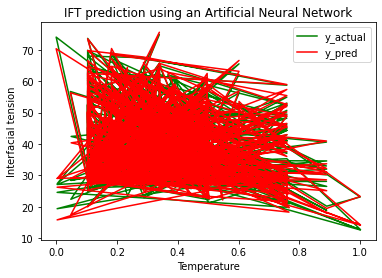

In [47]:
plt.figure()
plt.plot(X_ntest[:,0],y_nntest,'green', label='y_actual')
plt.plot(X_ntest[:,0],model.predict(X_ntest),'red', label='y_pred')
plt.legend(loc=1)
plt.xlabel("Temperature")
plt.ylabel("Interfacial tension")
plt.title("IFT prediction using an Artificial Neural Network")
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs=mean_absolute_error(y_nntest,model.predict(X_ntest))
mean_squared=mean_squared_error(y_nntest,model.predict(X_ntest))

mean_abs_t=mean_absolute_error(y_nntrain,model.predict(X_ntrain))
mean_squared_t=mean_squared_error(y_nntrain,model.predict(X_ntrain))

39/39 [==============================] - 0s 2ms/step


In [51]:
mean_abs

1.1914880039287061